In [1]:
# step1 unnecessary warnings during code exucution
import warnings
warnings.filterwarnings('ignore')

#step2 import pandas and numoy library
import pandas as pd
import numpy as np

# deciding decimal places
np.set_printoptions(precision=4, linewidth=100)

#matplot library for display data in graphical format
import matplotlib.pyplot as plt

In [2]:
#step3 importing datafile and storing it  into pandas dataframe(always)
stock_df = pd.read_csv('Finance.csv')
stock_df.head(10)

,Date,TCS,INFY,Nifty
0,01-Apr-20,1708.75,602.80,8253.80
1,03-Apr-20,1654.20,585.70,8083.80
2,07-Apr-20,1775.20,639.00,8792.20
3,08-Apr-20,1705.45,631.60,8748.75
4,09-Apr-20,1766.15,636.25,9111.90
5,13-Apr-20,1759.25,637.40,8993.85
6,15-Apr-20,1735.15,639.05,8925.30
7,16-Apr-20,1716.05,623.85,8992.80
8,17-Apr-20,1806.20,628.75,9266.75
9,20-Apr-20,1818.65,653.30,9261.85


In [3]:
#step4 information of data
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    249 non-null    object 
 1   TCS     249 non-null    float64
 2   INFY    249 non-null    float64
 3   Nifty   249 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Text(0, 0.5, 'INFY')

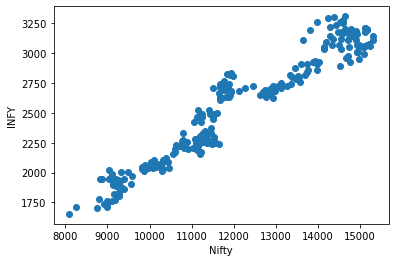

In [4]:
#step5 importing libraries for plotting the data (first assumption of LR model is linearity bet x and y)
plt.scatter(stock_df['Nifty'],stock_df['TCS'])
plt.xlabel('Nifty')
plt.ylabel('INFY')

In [5]:
#step6 importing statsmodel
import statsmodels.api as sm

# step 7 x is defined as independent variable (feature)
X=sm.add_constant(stock_df['Nifty'])
X.head(5)

,const,Nifty
0,1.0,8253.80
1,1.0,8083.80
2,1.0,8792.20
3,1.0,8748.75
4,1.0,9111.90


In [6]:
# step8 Y is defined as dependent varaible (target variable)
y=stock_df['INFY']

In [7]:
# step 9 importing library sklearn from ML model
from sklearn.model_selection import train_test_split

In [8]:
# step 10 splitting dataset into train and test data
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.8,random_state=100)

In [9]:
# step 11 fitting liner model equation
INFY_lm = sm.OLS(train_y,train_X).fit()

In [10]:
#STEP12 PRINTING RESULT OF LINEAR REGRESSION MODEL
print(INFY_lm.params)

const   -411.958724
Nifty      0.118922
dtype: float64


In [11]:
# step 13 summary of all the statistics of linear regression
INFY_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   INFY   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     2860.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          2.93e-119
Time:                        21:02:41   Log-Likelihood:                -1099.7
No. Observations:                 199   AIC:                             2203.
Df Residuals:                     197   BIC:                             2210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -411.9587     26.930    -15.297      0.000    -465.067    -358.851
Nifty          0.1189      0.002     53.482      0.000       0.115       0.123
==============================================================================
Omnibus:                        3.807   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.520
Skew:                           0.258   Prob(JB):                        0.172
Kurtosis:                       2.601   Cond. No.                     7.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# step 14  importing libraries for plotting the data
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [13]:
# step 15 importing libraries for plotting the data
get_ipython().run_line_magic('matplotlib','inline')

<Figure size 864x576 with 0 Axes>

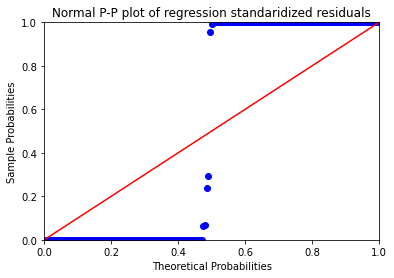

In [14]:
#step16 check for normal distribution of error
INFY_resid = INFY_lm.resid
probplot = sm.ProbPlot(INFY_resid)
plt.figure(figsize=(12,8))
probplot.ppplot(line='45')
plt.title("Normal P-P plot of regression standaridized residuals")
plt.show()
#strighht line indicats cummilative normal distribution
#dotted line indicates cummilative distribution of erros
# dots are closer to the straight line which indicates the res follows normdis

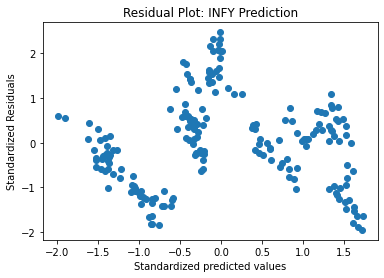

In [15]:
# Step 17 Test of Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( get_standardized_values( INFY_lm.fittedvalues ),
    get_standardized_values( INFY_resid ) )
plt.title( "Residual Plot: INFY Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");


In [16]:
#step18 oulier predicition using z score
from scipy.stats import zscore

In [17]:
stock_df['z_score_INFY'] = zscore(stock_df.INFY)

In [18]:
stock_df[(stock_df.z_score_INFY>3.0)| (stock_df.z_score_INFY< -3.0)]

,Date,TCS,INFY,Nifty,z_score_INFY


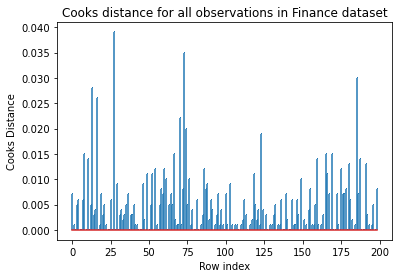

In [19]:
# Step 19    Outlier Detection using cook distance #
import numpy as np
INFY_influence = INFY_lm.get_influence() 
(c, p) = INFY_influence.cooks_distance 
plt.stem( np.arange( len(train_X) ), 
np.round( c, 3), 
markerfmt=","); 
plt.title("Cooks distance for all observations in Finance dataset"); 
plt.xlabel("Row index") 
plt.ylabel("Cooks Distance");


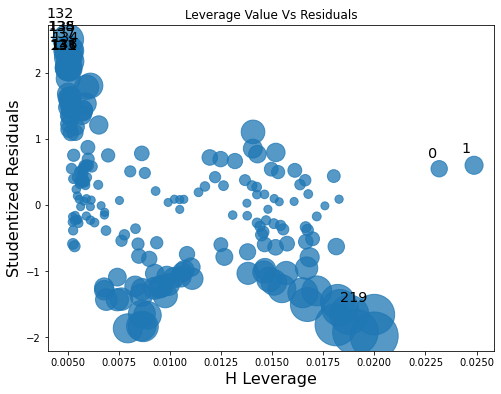

In [20]:
# Step 20    Outlier Detection using Leverage #
from statsmodels.graphics.regressionplots import influence_plot 
fig, ax = plt.subplots( figsize=(8,6)) 
influence_plot(INFY_lm, ax = ax) 
plt.title("Leverage Value Vs Residuals") 
plt.show();


In [21]:
# step 21 predicting on validation set
pred_y = INFY_lm.predict(test_X)

In [22]:
# Step 22  Strength of relatinship using R Square and error #
#Finding R-Square and RMSE#
from sklearn.metrics import r2_score, mean_squared_error


In [23]:
np.abs(r2_score(test_y,pred_y))

0.9403648699158879

In [24]:
import numpy as np

In [25]:
#finding root mean square error
np.sqrt(mean_squared_error(test_y,pred_y))

58.004816121023225

In [26]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
# Predict the y values
pred_y = INFY_lm.predict(test_X ) 
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( INFY_lm,test_X,alpha = 0.1) 
# Store all the values in a dataframe
pred_y_df = pd.DataFrame({'Nifty Closing': test_X['Nifty'], 
'pred_y': pred_y, 
'pred_y_left': pred_y_low, 
'pred_y_right': pred_y_high })


In [27]:
pred_y_df[0:10]

,Nifty Closing,pred_y,pred_y_left,pred_y_right
65,10813.45,874.003157,772.734866,975.271448
59,10430.05,828.408293,727.071938,929.744648
194,14484.75,1310.603119,1208.994879,1412.211358
112,11440.05,948.519959,847.320774,1049.719145
192,14137.35,1269.289462,1167.790127,1370.788797
169,13258.55,1164.780420,1063.485244,1266.075596
152,12631.10,1090.162534,988.950310,1191.374758
203,14371.90,1297.182721,1195.611605,1398.753837
214,15109.30,1384.876130,1283.032145,1486.720114
173,13478.30,1190.913627,1089.577010,1292.250243
